In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import warnings
from sklearn import preprocessing
import tensorflow as tf
import category_encoders as ce
warnings.filterwarnings("ignore")


In [3]:
flights = pd.read_csv(r'flights.csv', low_memory=False)
flights = flights[flights['MONTH'] == 1]
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469963,2015,1,31,6,B6,839,N658JB,JFK,BQN,2359,...,419.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
469964,2015,1,31,6,DL,1887,N855NW,SEA,DTW,2359,...,658.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
469965,2015,1,31,6,F9,300,N218FR,DEN,TPA,2359,...,534.0,23.0,0,0,NaN,21.0,0.0,2.0,0.0,0.0
469966,2015,1,31,6,F9,422,N954FR,DEN,ATL,2359,...,510.0,29.0,0,0,NaN,29.0,0.0,0.0,0.0,0.0


### Data types of all columns in the dataset

In [41]:
flights.dtypes

AIRLINE_0                  int64
AIRLINE_1                  int64
AIRLINE_2                  int64
AIRLINE_3                  int64
ORIGIN_AIRPORT_0           int64
ORIGIN_AIRPORT_1           int64
ORIGIN_AIRPORT_2           int64
ORIGIN_AIRPORT_3           int64
ORIGIN_AIRPORT_4           int64
ORIGIN_AIRPORT_5           int64
ORIGIN_AIRPORT_6           int64
ORIGIN_AIRPORT_7           int64
ORIGIN_AIRPORT_8           int64
DESTINATION_AIRPORT_0      int64
DESTINATION_AIRPORT_1      int64
DESTINATION_AIRPORT_2      int64
DESTINATION_AIRPORT_3      int64
DESTINATION_AIRPORT_4      int64
DESTINATION_AIRPORT_5      int64
DESTINATION_AIRPORT_6      int64
DESTINATION_AIRPORT_7      int64
DESTINATION_AIRPORT_8      int64
SCHEDULED_DEPARTURE        int64
DEPARTURE_TIME           float64
DEPARTURE_DELAY          float64
SCHEDULED_ARRIVAL          int64
ARRIVAL_TIME             float64
ARRIVAL_DELAY            float64
SCHEDULED_TIME           float64
ELAPSED_TIME             float64
dtype: obj

Checking if training and testing datasets have same columns (For exam)

In [ ]:
#Checking if the bases have the same columns
print(set(train_df.columns) == set(test_df.columns))

In [4]:
airports = pd.read_csv(r'airports.csv')
airlines = pd.read_csv(r'airlines.csv')

## Checking the missing value percentage in each column

In [5]:
def missing_values_data(dataframe):
    missing_value_percentage = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_values_data = pd.DataFrame({'column_name':dataframe.columns,
                                    'missing_value_percentage':missing_value_percentage})
    missing_values_data.sort_values('missing_value_percentage', inplace=True)
    return missing_values_data
    

In [6]:
missing_values_data(flights)

,column_name,missing_value_percentage
YEAR,YEAR,0.000000
MONTH,MONTH,0.000000
DAY,DAY,0.000000
DAY_OF_WEEK,DAY_OF_WEEK,0.000000
AIRLINE,AIRLINE,0.000000
FLIGHT_NUMBER,FLIGHT_NUMBER,0.000000
ORIGIN_AIRPORT,ORIGIN_AIRPORT,0.000000
DESTINATION_AIRPORT,DESTINATION_AIRPORT,0.000000
SCHEDULED_DEPARTURE,SCHEDULED_DEPARTURE,0.000000
SCHEDULED_ARRIVAL,SCHEDULED_ARRIVAL,0.000000


#### We can see that many columns have zero value percentage of more than 75%. As most of these values are missing, these columns wouldn't contribute much in the flight arrival delay. Hence it is ideal to drop these columns rather than imputing non zero values in the place of NaNs

In [7]:
columns_to_drop = ['LATE_AIRCRAFT_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','WEATHER_DELAY','CANCELLATION_REASON']
flights.drop(columns_to_drop, axis=1, inplace = True)
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469963,2015,1,31,6,B6,839,N658JB,JFK,BQN,2359,...,200.0,179.0,1576,416.0,3.0,440,419.0,-21.0,0,0
469964,2015,1,31,6,DL,1887,N855NW,SEA,DTW,2359,...,239.0,209.0,1927,644.0,14.0,711,658.0,-13.0,0,0
469965,2015,1,31,6,F9,300,N218FR,DEN,TPA,2359,...,212.0,168.0,1506,525.0,9.0,511,534.0,23.0,0,0
469966,2015,1,31,6,F9,422,N954FR,DEN,ATL,2359,...,191.0,141.0,1199,500.0,10.0,441,510.0,29.0,0,0


In [8]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED'],
      dtype='object')

#### At this step, I choose the columns that make the most sense on an intuitive level in affecting the departure delay

In [9]:
flights = flights[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
        'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
        'SCHEDULED_TIME', 'ELAPSED_TIME']]
flights

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME
0,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,205.0,194.0
1,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,280.0,279.0
2,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,286.0,293.0
3,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,285.0,281.0
4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,235.0,215.0
...,...,...,...,...,...,...,...,...,...,...,...
469963,B6,JFK,BQN,2359,2359.0,0.0,440,419.0,-21.0,221.0,200.0
469964,DL,SEA,DTW,2359,2359.0,0.0,711,658.0,-13.0,252.0,239.0
469965,F9,DEN,TPA,2359,2.0,3.0,511,534.0,23.0,192.0,212.0
469966,F9,DEN,ATL,2359,2359.0,0.0,441,510.0,29.0,162.0,191.0


#### Check the missing values again 

In [10]:
missing_values_data(flights)

,column_name,missing_value_percentage
AIRLINE,AIRLINE,0.000000
ORIGIN_AIRPORT,ORIGIN_AIRPORT,0.000000
DESTINATION_AIRPORT,DESTINATION_AIRPORT,0.000000
SCHEDULED_DEPARTURE,SCHEDULED_DEPARTURE,0.000000
SCHEDULED_ARRIVAL,SCHEDULED_ARRIVAL,0.000000
SCHEDULED_TIME,SCHEDULED_TIME,0.000000
DEPARTURE_TIME,DEPARTURE_TIME,2.480382
DEPARTURE_DELAY,DEPARTURE_DELAY,2.480382
ARRIVAL_TIME,ARRIVAL_TIME,2.611029
ARRIVAL_DELAY,ARRIVAL_DELAY,2.756571


Missing values % is very minimal and all of it is in time datatype, it is hard to impute mean values, hence let's just drop the rows with null values

In [11]:
flights.dropna(inplace=True)

In [12]:
missing_values_data(flights)

,column_name,missing_value_percentage
AIRLINE,AIRLINE,0.0
ORIGIN_AIRPORT,ORIGIN_AIRPORT,0.0
DESTINATION_AIRPORT,DESTINATION_AIRPORT,0.0
SCHEDULED_DEPARTURE,SCHEDULED_DEPARTURE,0.0
DEPARTURE_TIME,DEPARTURE_TIME,0.0
DEPARTURE_DELAY,DEPARTURE_DELAY,0.0
SCHEDULED_ARRIVAL,SCHEDULED_ARRIVAL,0.0
ARRIVAL_TIME,ARRIVAL_TIME,0.0
ARRIVAL_DELAY,ARRIVAL_DELAY,0.0
SCHEDULED_TIME,SCHEDULED_TIME,0.0


In [13]:
flights

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME
0,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,205.0,194.0
1,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,280.0,279.0
2,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,286.0,293.0
3,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,285.0,281.0
4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,235.0,215.0
...,...,...,...,...,...,...,...,...,...,...,...
469963,B6,JFK,BQN,2359,2359.0,0.0,440,419.0,-21.0,221.0,200.0
469964,DL,SEA,DTW,2359,2359.0,0.0,711,658.0,-13.0,252.0,239.0
469965,F9,DEN,TPA,2359,2.0,3.0,511,534.0,23.0,192.0,212.0
469966,F9,DEN,ATL,2359,2359.0,0.0,441,510.0,29.0,162.0,191.0


We have to categorize the columns AIRLINE, ORIGIN_AIRPORT and DESTINATION_AIRPORT before proceeding to the modeling. Let's check its cardinality

In [14]:
print(flights['AIRLINE'].unique())
print(" ")
print(flights['ORIGIN_AIRPORT'].unique())
print(" ")
print(flights['DESTINATION_AIRPORT'].unique())

['AS' 'AA' 'US' 'DL' 'NK' 'UA' 'HA' 'B6' 'OO' 'EV' 'F9' 'WN' 'MQ' 'VX']
 
['ANC' 'LAX' 'SFO' 'SEA' 'LAS' 'DEN' 'SLC' 'PDX' 'FAI' 'MSP' 'PHX' 'SJU'
 'PBG' 'IAG' 'PSE' 'BQN' 'ORD' 'GEG' 'HNL' 'ONT' 'MCO' 'BOS' 'HIB' 'ABR'
 'DFW' 'MKE' 'IAH' 'BNA' 'BRO' 'VPS' 'BOI' 'BJI' 'PHL' 'SBN' 'EUG' 'IAD'
 'BUF' 'PWM' 'JFK' 'CRP' 'PIA' 'FAT' 'SMF' 'AUS' 'MCI' 'ATL' 'JAX' 'MFR'
 'IDA' 'MSN' 'DCA' 'SAT' 'CHS' 'SBA' 'IND' 'CLE' 'GSP' 'BDL' 'RIC' 'BFL'
 'OMA' 'RDM' 'FLL' 'CID' 'TPA' 'SYR' 'ROC' 'TYR' 'LAN' 'GSO' 'EWR' 'PBI'
 'RSW' 'OAK' 'PVD' 'RNO' 'PIT' 'ABQ' 'MIA' 'BWI' 'TUL' 'LGA' 'LIT' 'MSY'
 'OKC' 'ATW' 'PNS' 'MEM' 'TYS' 'MHT' 'SAV' 'CLT' 'GRB' 'ABE' 'JAN' 'OAJ'
 'FAR' 'ERI' 'LEX' 'CWA' 'TTN' 'RDU' 'CVG' 'BHM' 'ACY' 'DTW' 'RAP' 'TUS'
 'EAU' 'DLH' 'FSD' 'INL' 'SPI' 'CLD' 'COD' 'CMH' 'PSC' 'CPR' 'ACV' 'DAL'
 'PAH' 'MRY' 'ESC' 'ISN' 'PSP' 'CAE' 'STL' 'BTV' 'MTJ' 'GCC' 'OGG' 'SJC'
 'GUC' 'ORF' 'MOT' 'MLU' 'KOA' 'HOU' 'MOB' 'SAN' 'LAW' 'PIB' 'MGM' 'SBP'
 'COS' 'LAR' 'DRO' 'BIS' 'ITO' 'BTR' 'HLN' 'BZN' '

These column have high cardinality, hence let's use Binary Encoder, which suits columns with higher cardinality better than normal or one-hot encoders

In [15]:
binary_encoder = ce.BinaryEncoder(cols=['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT'])

In [16]:
flights = binary_encoder.fit_transform(flights)

In [17]:
flights.columns

Index(['AIRLINE_0', 'AIRLINE_1', 'AIRLINE_2', 'AIRLINE_3', 'ORIGIN_AIRPORT_0',
       'ORIGIN_AIRPORT_1', 'ORIGIN_AIRPORT_2', 'ORIGIN_AIRPORT_3',
       'ORIGIN_AIRPORT_4', 'ORIGIN_AIRPORT_5', 'ORIGIN_AIRPORT_6',
       'ORIGIN_AIRPORT_7', 'ORIGIN_AIRPORT_8', 'DESTINATION_AIRPORT_0',
       'DESTINATION_AIRPORT_1', 'DESTINATION_AIRPORT_2',
       'DESTINATION_AIRPORT_3', 'DESTINATION_AIRPORT_4',
       'DESTINATION_AIRPORT_5', 'DESTINATION_AIRPORT_6',
       'DESTINATION_AIRPORT_7', 'DESTINATION_AIRPORT_8', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME'],
      dtype='object')

## Splitting into training and testing sets

In [18]:
from sklearn.model_selection import train_test_split

nrow, ncol = flights.shape
X = (flights.drop('ARRIVAL_DELAY',axis=1)).to_numpy()
y = flights['ARRIVAL_DELAY'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [19]:
X_train.shape, y_train.shape

((319909, 29), (319909,))

In [20]:
X_test.shape, y_test.shape

((137104, 29), (137104,))

# MODEL 1 - Decision tree

In [21]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor(random_state=44)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=44)

## MSE

In [22]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)

In [23]:
rms

4.088547752128834

## MAE

In [24]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

1.7769065818648617

### Comparing the predictions with actual labels

In [25]:
list_of_cols = list(zip(y_test, y_pred))
compare_predictions = pd.DataFrame(list_of_cols,columns=['Test labels','Predicted Labels'])

In [26]:
compare_predictions

,Test labels,Predicted Labels
0,-1.0,-1.0
1,-12.0,-12.0
2,7.0,7.0
3,-10.0,-10.0
4,-9.0,-11.0
...,...,...
137099,-13.0,-12.0
137100,-9.0,-9.0
137101,7.0,9.0
137102,-35.0,-35.0


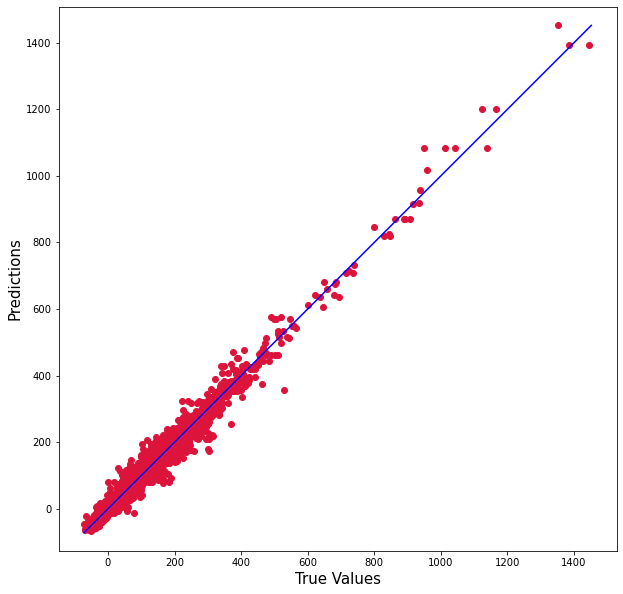

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# MODEL 2 - Ridge Regression

In [28]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

ridgereg = Ridge(alpha=0.3, normalize=True)
poly = PolynomialFeatures(degree = 2)
X_ = poly.fit_transform(X_train)
ridgereg.fit(X_, y_train)

Ridge(alpha=0.3, normalize=True)

In [30]:
X_ = poly.fit_transform(X_test)
result_1 = ridgereg.predict(X_)
score = mean_squared_error(result_1, y_test)
print("Mean squared error = ", score)

Mean squared error =  112.65002549435533


As we have seen here, the MSE is way off. We need to tweak the parameters a little to get an optimal result

### Hyperparameter tuning

Let us try with a reduced alpha value

In [32]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

ridgereg_2 = Ridge(alpha=0.1, normalize=True)
poly = PolynomialFeatures(degree = 2)
X_ = poly.fit_transform(X_train)
ridgereg_2.fit(X_, y_train)

X_ = poly.fit_transform(X_test)
result_2 = ridgereg_2.predict(X_)
score = mean_squared_error(result_2, y_test)
print("Mean squared error = ", score)

Mean squared error =  56.83103644361527


Let us now try to further decrease the alpha value to observe a change in MSE

In [33]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

ridgereg_3 = Ridge(alpha=0.01, normalize=True)
poly = PolynomialFeatures(degree = 2)
X_ = poly.fit_transform(X_train)
ridgereg_3.fit(X_, y_train)

X_ = poly.fit_transform(X_test)
result_3 = ridgereg_3.predict(X_)
score = mean_squared_error(result_3, y_test)
print("Mean squared error = ", score)

Mean squared error =  7.673934446403576


Our MSE is considerable very low, which is great!

#### Let's compare test labels and predicted labels

In [35]:
list_of_cols_ridge = list(zip(y_test, result_3))
compare_predictions_ridge = pd.DataFrame(list_of_cols_ridge,columns=['Test labels','Predicted Labels'])
compare_predictions_ridge

,Test labels,Predicted Labels
0,-1.0,-1.522620
1,-12.0,-13.300684
2,7.0,4.590791
3,-10.0,-9.790882
4,-9.0,-7.838760
...,...,...
137099,-13.0,-12.268841
137100,-9.0,-9.091313
137101,7.0,6.447263
137102,-35.0,-28.696083


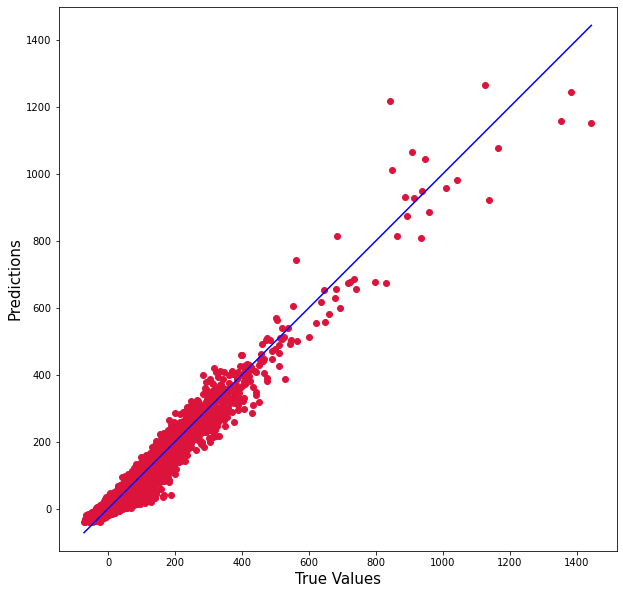

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(y_test, result_1, c='crimson')
#plt.yscale('log')
#plt.xscale('log')
p1 = max(max(result_1), max(y_test))
p2 = min(min(result_1), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

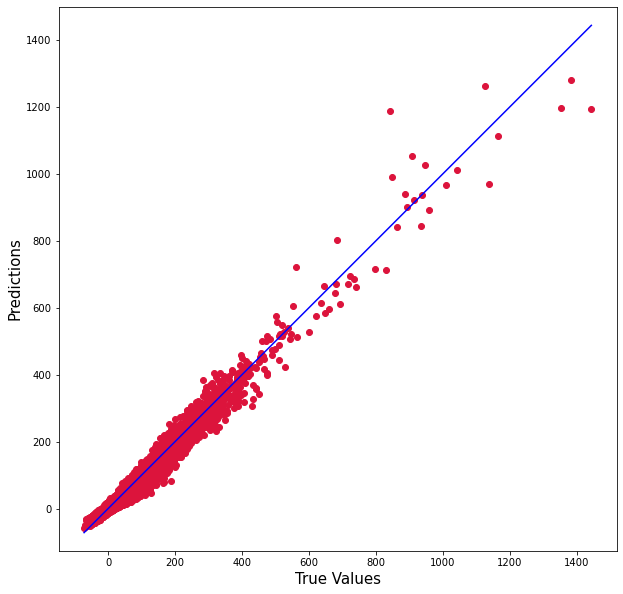

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(y_test, result_2, c='crimson')
#plt.yscale('log')
#plt.xscale('log')
p1 = max(max(result_2), max(y_test))
p2 = min(min(result_2), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

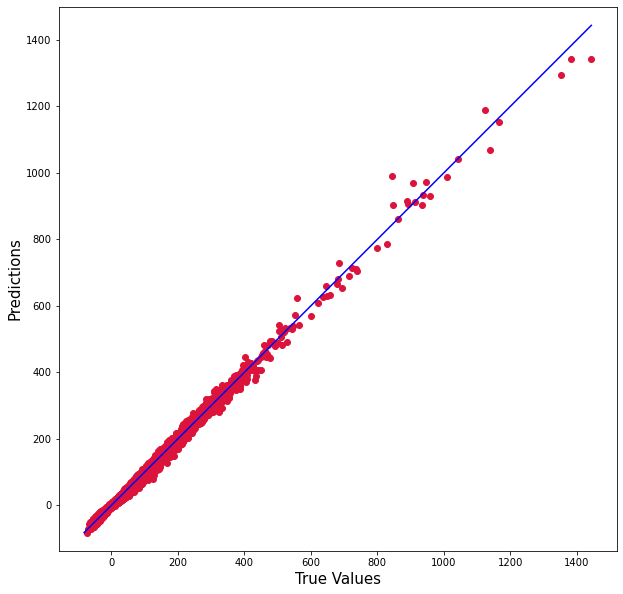

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(y_test, result_3, c='crimson')
#plt.yscale('log')
#plt.xscale('log')
p1 = max(max(result_3), max(y_test))
p2 = min(min(result_3), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()